## Observations and Insights 

In [173]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import os

# filter for warnings:
import warnings
warnings.filterwarnings('ignore')

# File path for the saved plots
file_path = os.path.join("images","")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [174]:
# Checking the number of mice in the DataFrame.
len(merged_df['Mouse ID'].unique())

249

In [175]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_df = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicated_mouse_df

array(['g989'], dtype=object)

In [176]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [177]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicated_mouse_df) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [178]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [179]:
# Generate a summary statistics table of mean, median, 
    #variance, standard deviation, and SEM 
    #of the tumor volume for each regimen

# This method is the most straightforward, 
    #creating multiple series and putting them all together at the end.

In [180]:
# Create a summary table
means = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
medians = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
means = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_table1 = pd.DataFrame({"Average Tumor Volume (mm3)": means,
                               "Median Tumor Volume (mm3)": medians,
                               "Std. Dev. Tumor Volume (mm3)": std,
                               "Sem Tumor Volume (mm3)": sem,
                               "Variance Tumor Volume (mm3)": variance})
summary_table1

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Std. Dev. Tumor Volume (mm3),Sem Tumor Volume (mm3),Variance Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.320930,50.446266,6.622085,0.544332,43.852013
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


In [181]:
# Generate a summary statistics table of mean, 
    #median, variance, standard deviation, and SEM 
    #of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

In [182]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [183]:
# Create a drug list to iterate over:
drug_list = summary_table1.index.tolist()
drug_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [184]:
# # Making sure the grud list is an array by iterating through it
# drug_name = ""
# drug_list2 = []
# for x in range(len(drug_list)):
#     drug_name = drug_list[x]
#     drug_list2.append(drug_name)
# print(drug_list2)

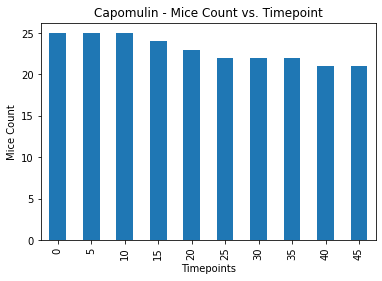

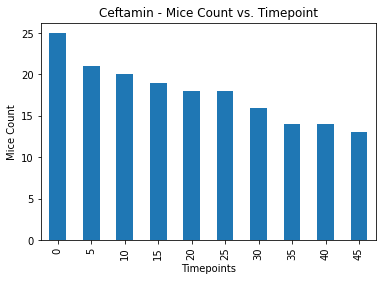

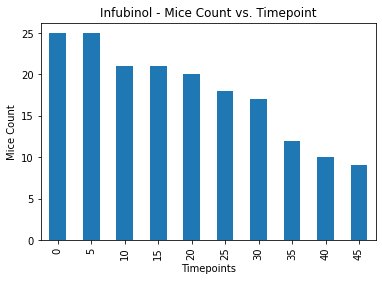

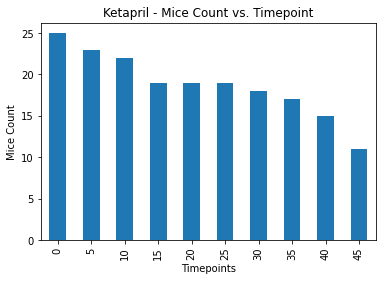

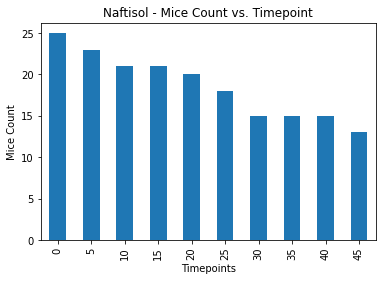

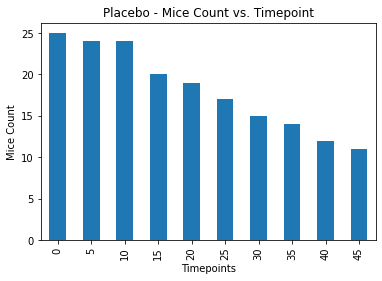

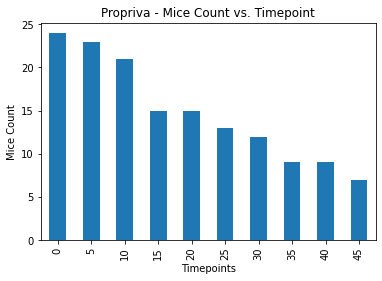

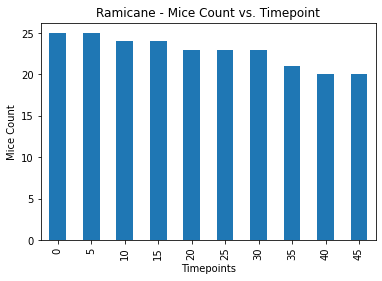

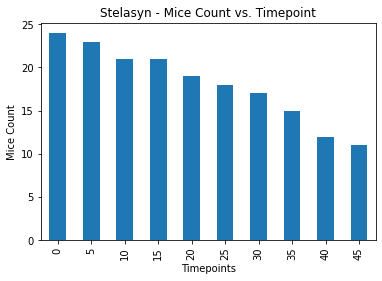

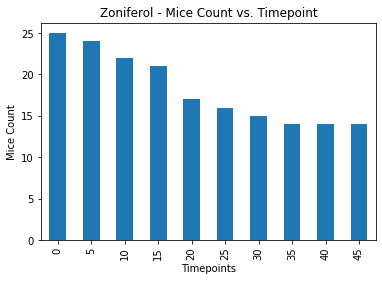

In [185]:
for x in range(len(drug_list)):
    drug_name = drug_list[x]
    drug_list[x] = clean_df.loc[clean_df["Drug Regimen"] == drug_list[x]]
    plot_title = f"{drug_name} - Mice Count vs. Timepoint"
    drug_list[x] = drug_list[x][["Mouse ID", "Timepoint"]]
    drug_list[x] = drug_list[x].groupby('Timepoint')
    mouse_id = drug_list[x]['Mouse ID'].count()
    timepoint_barchart = mouse_id.plot(kind='bar', title=plot_title)
    timepoint_barchart.set_xlabel("Timepoints")
    timepoint_barchart.set_ylabel("Mice Count")
    plt.show()

In [186]:
# Same plots using plt.bar
x_axis = [value for value in range(0, 50, 5)]

In [187]:
# Start with 'Capomulin'
drug_list_plt = summary_table1.index.tolist()
drug_name_plt = ""
for x in range(len(drug_list_plt)):
    drug_name_plt = drug_list_plt[x]
    print(drug_name_plt)

Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn
Zoniferol


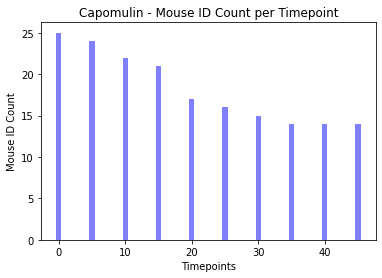

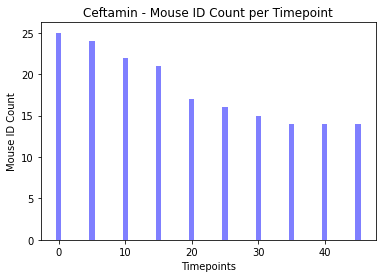

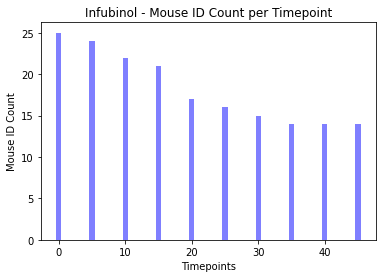

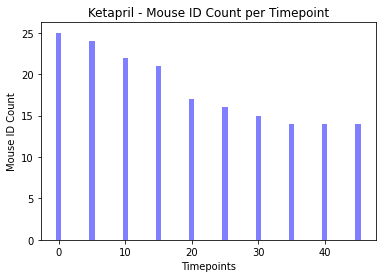

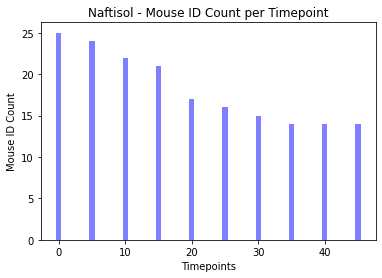

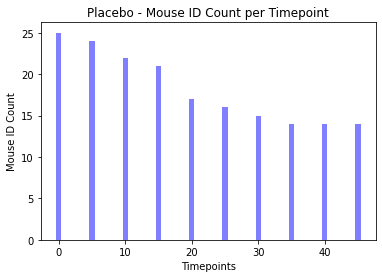

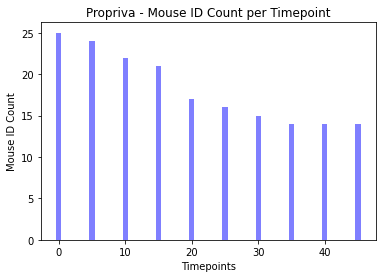

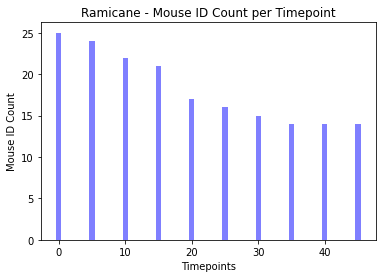

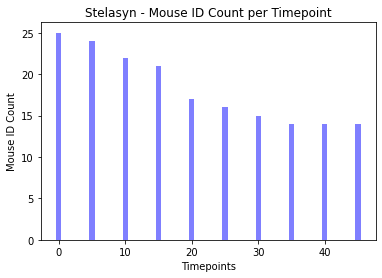

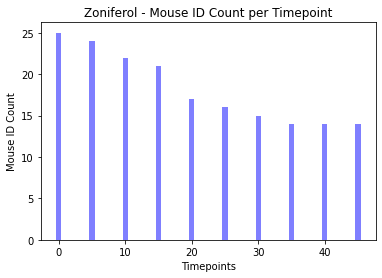

In [188]:
drug_list_plt = summary_table1.index.tolist()
drug_name_plt = ""
for x in range(len(drug_list)):
    drug_name_plt = drug_list_plt[x]
    #print(drug_name_plt)
    plt.bar(x_axis, mouse_id, color='b', alpha=0.5, align="center")
    #plt.xticks(value for value in range(0, 50, 5))
    plt.title(f"{drug_name_plt} - Mouse ID Count per Timepoint")
    plt.xlabel("Timepoints")
    plt.ylabel("Mouse ID Count")
    plt.savefig(f"{drug_name_plt}_MouseID_Count_per_Timepoint")
    plt.show()

In [189]:
# if have more time - Try to merge the plots above into one plot:

In [190]:
# Option 3 - aggregate the plots into one:
# Create a grouped_df with two columns:
grouped_gf = clean_df.groupby(['Timepoint','Drug Regimen'])
mice_count = grouped_gf['Timepoint'].count()
mice_count

Timepoint  Drug Regimen
0          Capomulin       25
           Ceftamin        25
           Infubinol       25
           Ketapril        25
           Naftisol        25
                           ..
45         Placebo         11
           Propriva         7
           Ramicane        20
           Stelasyn        11
           Zoniferol       14
Name: Timepoint, Length: 100, dtype: int64

In [191]:
agg_df = clean_df.groupby(['Drug Regimen','Timepoint']).agg({'Mouse ID':'count'})
#csv.to_excel("agg_df.csv")
print(agg_df)

                        Mouse ID
Drug Regimen Timepoint          
Capomulin    0                25
             5                25
             10               25
             15               24
             20               23
...                          ...
Zoniferol    25               16
             30               15
             35               14
             40               14
             45               14

[100 rows x 1 columns]


In [192]:
# This dictionary is to color the bars in the custom plot based on specific drug.
values = ["royalblue","darkorange","green","red","lime","blueviolet","pink","cornflowerblue","peru","lightseagreen"]
keys = drug_list_plt
color_drug_dict = dict(zip(keys, values))
print(color_drug_dict)

{'Capomulin': 'royalblue', 'Ceftamin': 'darkorange', 'Infubinol': 'green', 'Ketapril': 'red', 'Naftisol': 'lime', 'Placebo': 'blueviolet', 'Propriva': 'pink', 'Ramicane': 'cornflowerblue', 'Stelasyn': 'peru', 'Zoniferol': 'lightseagreen'}


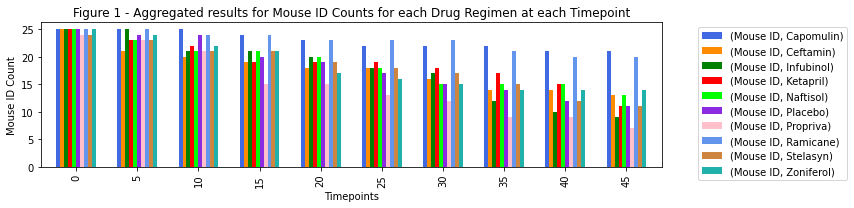

<Figure size 432x288 with 0 Axes>

In [193]:
#colors_drug_dict = pd.dict({})
agg_df.unstack(0).plot(kind="bar",figsize=(12,3), label='_nolegend_', color=values, width=0.65) 
plt.title("Figure 1 - Aggregated results for Mouse ID Counts for each Drug Regimen at each Timepoint")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Timepoints")
plt.ylabel("Mouse ID Count")
plt.tight_layout()
plt.show()
plt.savefig("agg_df_plot")

#### Change from Markdown to Code to try plotting custom plots
#### Practicing getting a custom plot based on the user input of the Drug Regimen:
drug_user_input = input("What Drug Regimen would you like to look up?")

#### Change from Markdown to Code to try plotting custom plots
#### Note: the color-code will be based on the aggregated plot above.
for x in range(len(drug_list_plt)):
    if drug_user_input == drug_list_plt[x]:
        x_axis = [value for value in range(0, 50, 5)]
        mouse_id = drug_list[x]['Mouse ID'].count()
        color = color_drug_dict.get(drug_list_plt[x], "")
        print()
        plt.bar(x_axis, mouse_id, color=color, width=3, alpha=.75, align="center")
        plt.title(f"{drug_user_input} - Mouse ID Count per Timepoint")
        plt.xlabel("Timepoints")
        plt.ylabel("Mouse ID Count")
        plt.show()
        break
print(x_axis)

In [194]:
# How to identify the 4 most promising drug regimens from the plot above.
# Attempt 2 - Use sum() function on each of the drug regimen's timepoints
agg_tp_df = clean_df.groupby(['Drug Regimen', 'Timepoint']).agg({'Timepoint':'sum'})
print(agg_tp_df)

                        Timepoint
Drug Regimen Timepoint           
Capomulin    0                  0
             5                125
             10               250
             15               360
             20               460
...                           ...
Zoniferol    25               400
             30               450
             35               490
             40               560
             45               630

[100 rows x 1 columns]


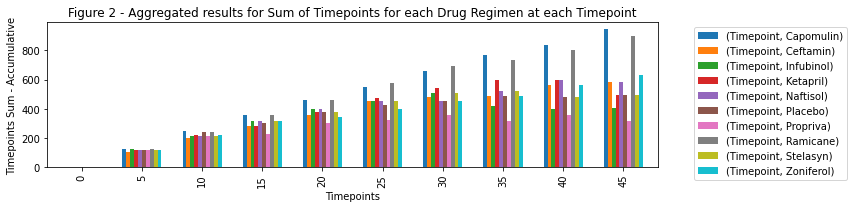

Based on the graph below, the top 4 treatments are: 


<Figure size 432x288 with 0 Axes>

In [195]:
# plot with unstack option:
agg_tp_df.unstack(0).plot(kind="bar",figsize=(12,3), label='_nolegend_', width=0.65) 
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Figure 2 - Aggregated results for Sum of Timepoints for each Drug Regimen at each Timepoint")
plt.xlabel("Timepoints")
plt.ylabel("Timepoints Sum - Accumulative")
plt.tight_layout()
plt.show()
plt.savefig("agg_tp_df.png")
print(f"Based on the graph below, the top 4 treatments are: ")

In [196]:
# Attempt 3 - Use max() function on each of the drug regimen's timepoints
agg_tp_max_df = clean_df.groupby(['Drug Regimen', 'Timepoint']).agg({'Timepoint':'max'})

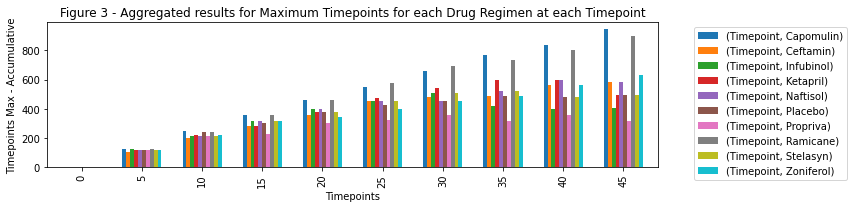

Based on the graph below, the top 4 treatments are: 


<Figure size 432x288 with 0 Axes>

In [197]:
# plot with unstack option:
agg_tp_df.unstack(0).plot(kind="bar",figsize=(12,3), label='_nolegend_', width=0.65) 
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Figure 3 - Aggregated results for Maximum Timepoints for each Drug Regimen at each Timepoint")
plt.xlabel("Timepoints")
plt.ylabel("Timepoints Max - Accumulative")
plt.tight_layout()
plt.show()
plt.savefig("agg_tp_df.png")
print(f"Based on the graph below, the top 4 treatments are: ")

In [198]:
# Try extracting top 4 Timepoints based on their maximum value:
mean_tumor_volume = clean_df.groupby(['Drug Regimen', 'Timepoint']).mean()
mean_tumor_volume.head()
# mean_df.to_csv("new_df.csv")

Tumor Volume (mm3)  Metastatic Sites  Age_months  \
Drug Regimen Timepoint                                                     
Capomulin    0                   45.000000          0.000000   14.040000   
             5                   44.266086          0.160000   14.040000   
             10                  43.084291          0.320000   14.040000   
             15                  42.064317          0.375000   13.666667   
             20                  40.716325          0.652174   13.304348   

                        Weight (g)  
Drug Regimen Timepoint              
Capomulin    0           20.120000  
             5           20.120000  
             10          20.120000  
             15          20.000000  
             20          19.782609

In [199]:
mean_tumor_volume = mean_tumor_volume['Tumor Volume (mm3)'].reset_index()
mean_tumor_volume.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [200]:
std_tumor_volume = clean_df.groupby(["Drug Regimen","Timepoint"]).std().reset_index()
std_tumor_volume.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
0,Capomulin,0,0.000000,0.000000,7.850053,2.862400
1,Capomulin,5,2.242964,0.374166,7.850053,2.862400
2,Capomulin,10,3.513422,0.627163,7.850053,2.862400
3,Capomulin,15,4.108369,0.646899,7.788881,2.859006
4,Capomulin,20,4.362915,0.775107,7.754382,2.712874


In [201]:
sem_tumor_volume = clean_df.groupby(["Drug Regimen","Timepoint"]).sem().reset_index()
sem_tumor_volume.head()

,Drug Regimen,Timepoint,Age_months,Metastatic Sites,Mouse ID,Sex,Tumor Volume (mm3),Weight (g)
0,Capomulin,0,1.570011,0.000000,NaN,NaN,0.000000,0.572480
1,Capomulin,5,1.570011,0.074833,NaN,NaN,0.448593,0.572480
2,Capomulin,10,1.570011,0.125433,NaN,NaN,0.702684,0.572480
3,Capomulin,15,1.589899,0.132048,NaN,NaN,0.838617,0.583592
4,Capomulin,20,1.616900,0.161621,NaN,NaN,0.909731,0.565673


## Pie Plots

In [202]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [203]:
gender_df = clean_df.groupby("Sex")
gender_df.count()
gender_mice_filtered = gender_df["Sex"]
gender_mice_filtered.count()

Sex
Female    922
Male      958
Name: Sex, dtype: int64

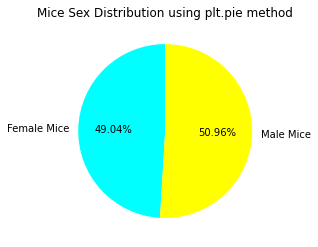

In [204]:
# Generate Pie Plot using plt.pie()
labels = ["Female Mice", "Male Mice"]
sizes = [gender_mice_filtered.count()]
colors = ['cyan', 'yellow']
plt.pie(sizes, labels=labels, autopct="%.2f%%", startangle=90, colors=colors)
plt.title("Mice Sex Distribution using plt.pie method")
plt.savefig("Female and Male Mice Distribution")
plt.show()

In [207]:
# # Plot Mice Sex distribution using PyPlot.plot() method:
# df = pd.DataFrame({'Sex': ['Female', 'Male'],
#                    'Mouse ID Counts': [922, 958]},
#                    index=['Female Mice', 'Male Mice'])
# plt = df.plot.pie(y='Mouse ID Counts', title="Mice Sex Distribution using plot.pie() method", labels=['',''], figsize=(4,4), startangle=90, autopct="%.2f%%", colors=['c','y'])
# #plt.title("Mice Sex Distribution")

In [208]:
# # Dependencies and Setup
# import matplotlib.pyplot as plt
# import pandas as pd
# import scipy.stats as sts
# import numpy as np
# import os

In [209]:
# # Example from Pandas documentation - works:
# doc_df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
#                    'radius': [2439.7, 6051.8, 6378.1]},
#                   index=['Mercury', 'Venus', 'Earth'])
# doc_df

In [213]:
# doc_plot = df.plot.pie(y='mass', figsize=(5, 5))
sizes

[Sex
 Female    922
 Male      958
 Name: Sex, dtype: int64]

In [211]:
# Sex distribution using plot.pie()
doc_df = pd.DataFrame({'Counts': [922, 958]},
                  index=['Female', 'Male'])
doc_df

,Counts
Female,922
Male,958


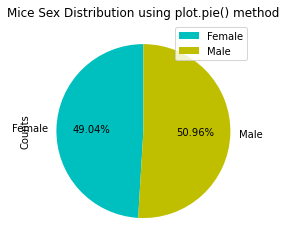

In [212]:
plot_sex = doc_df.plot.pie(y='Counts', title="Mice Sex Distribution using plot.pie() method", labels=['Female','Male'], figsize=(4,4), startangle=90, autopct="%.2f%%", colors=['c','y'])

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#### Based on the analysis above (particularly Figure 1 - Aggregated Results), the four most promising treatments are:
['Capomulin', 'Ramicane', 'Ketapril', 'Zoniferol']
#### However, this is only visually. Continue the analysis on All Drug Regimens through statistical analysis.

In [35]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [36]:
# Prepare a new df to work on the statistics part:
tumor_volume_df = clean_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
# Grouped by the 'Drug Regimen' and "Timepoint"
grouped_tumor_volume_df = tumor_volume_df.groupby(['Drug Regimen', 'Timepoint'])
# Reset index and sort values in descending order:
sorted_noindex_mean_grouped_tumor_volume_df = grouped_tumor_volume_df.mean().reset_index().sort_values(['Tumor Volume (mm3)'], ascending=False)
# Try to use loc function to extract the data only for Capomulin drug regimen.
drug1_Capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
# Select only Tumor Volume and Timpoint columns
drug1_Capomulin_filtered = drug1_Capomulin[['Timepoint', 'Tumor Volume (mm3)']]
# Group by Timepoint
drug1_Capomulin_filtered_grouped = drug1_Capomulin_filtered.groupby('Timepoint')
# Mean of group by object and rename the column of the filtered
drug1_Capomulin_filtered_grouped.mean()
drug1_Capomulin_filtered.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3) Capomulin'})


,Timepoint,Tumor Volume (mm3) Capomulin
0,0,45.000000
226,0,45.000000
227,0,45.000000
228,0,45.000000
229,0,45.000000
...,...,...
1854,45,40.728578
1859,45,38.125164
1878,45,47.685963
1888,45,41.581521


In [37]:
tumor_volume = drug1_Capomulin_filtered['Tumor Volume (mm3)']
tumor_volume

0       45.000000
226     45.000000
227     45.000000
228     45.000000
229     45.000000
          ...    
1854    40.728578
1859    38.125164
1878    47.685963
1888    41.581521
1889    31.023923
Name: Tumor Volume (mm3), Length: 230, dtype: float64

In [38]:
# From Instructions - README:
# Calculate the final tumor volume of each mouse 
    # across four of the most promising treatment regimens: 
        #Capomulin, Ramicane, Infubinol, and Ceftamin. 
        
# Calculate the quartiles and IQR and quantitatively determine 
    # if there are any potential outliers across all four treatment regimens.

drug1_Capomulin_filtered_grouped_by_mouse_id = drug1_Capomulin_filtered.groupby('Mouse ID')
# Mean of group by object and rename the column of the filtered
drug1_Capomulin_filtered_grouped_by_mouse_id
#drug1_Capomulin_filtered.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3) Capomulin'})


KeyError: 'Mouse ID'

In [ ]:
# Prepare a new df to work on the statistics part:
mouse_id_df = clean_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
# Grouped by the 'Mouse ID'
grouped_mouse_id_df = mouse_id_df.groupby('Mouse ID')
# Reset index and sort values in descending order:
sorted_noindex_mean_grouped_grouped_mouse_id_df = grouped_mouse_id_df.mean().reset_index().sort_values(['Tumor Volume (mm3)'], ascending=False)
# Try to use loc function to extract the data only for Capomulin drug regimen.
drug1_Capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
# Select only Tumor Volume and Timpoint columns
drug1_Capomulin_filtered = drug1_Capomulin[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
# Group by Timepoint
drug1_Capomulin_filtered_grouped = drug1_Capomulin_filtered.groupby('Mouse ID')
# Mean of group by object and rename the column of the filtered
drug1_Capomulin_filtered_grouped.mean()
drug1_Capomulin_filtered.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3) Capomulin'})


In [ ]:
fig1, ax1 = plt.subplots(ncols=0)
ax1.set_title('Tumor Volume (mm3) - Capomulin')
ax1.set_ylabel('Timepoints y axis')
ax1.boxplot(tumor_volume)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume average size per timepoint, for each Drug Regimen")
ax1.set_ylabel("Drug Regimen")
ax1.boxplot(temp)
plt.show()

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
